# Importance Sampling

**Rebecca Booth** and **Nathan Meulenbroek** <br />
Department of Physics and Astronomy <br />
University of Calgary, 2018 <br />

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
%matplotlib inline

## Definitions:

**Probability distribution function (PDF)**: A function which describes the likelihood of sampling a specific value [1].

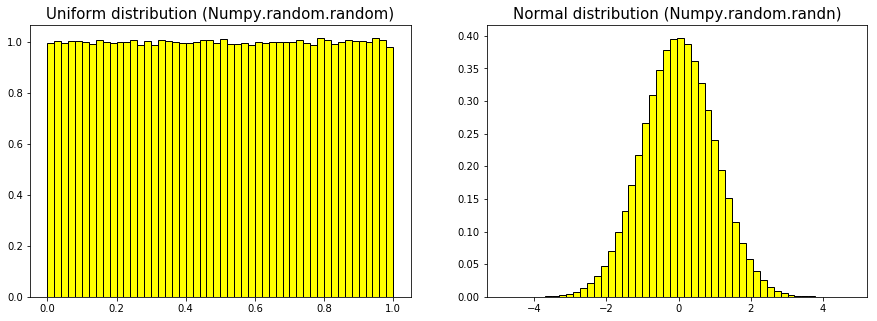

In [2]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
x = np.random.random(1000000)
x1 = np.random.randn(1000000)


#*******Plotting*******
ax[0].hist(x, bins=50, ec='black', color='yellow', normed=True)
ax[0].set_title('Uniform distribution (Numpy.random.random)', fontsize=15)

ax[1].hist(x1, bins=50, ec='black', color='yellow', normed=True)
ax[1].set_title('Normal distribution (Numpy.random.randn)', fontsize=15);

**Expected value**: 

-The long-run average value of repetitions of a random variable [2].

-The expected value of a function, $f(x)$, with x values drawn from a PDF, $p(x)$. 
In general, $E(f(X))=\int f(x)p(x)dx$ where x is sampled from $p(x)$ (the PDF) [3].  

**Our notation**: 

Function to get expectation value for:  $f(x)$  	

PDF:   $p(x)$	

## Monte Carlo

“Monte Carlo is the art of approximating and expectation by the sample mean of a function of simulated random variables.”

-Eric C. Anderson, *Lecture Notes for Stat 578C* [4]

For a random distribution X, we approximate the expected value [4] $$E(f(X))=\frac{1}{N}\sum^N_{n=1}f(x_n)$$.

**Law of large numbers**: $E(f(X))$ will converge to the theoretical value for large N [3].

To improve runtime and maintain accuracy, take the average of $E(f(X))$ over many simulations but for fewer points.


# Example 1

Let’s say that we wanted to get the expectation value for the function f(x) below, with x values drawn from a standard normal distribution p(x) centred at x=0

$f(x)=10e^{-5x^4}$

$p(x)=\frac{1}{\sqrt{2\pi}}e^{\frac{-x^2}{2}}$

**Note**: the function f(x), and PDFs p(x) and q(x), used in examples 1, 2, and 3, were modified from the example in reference [5]  


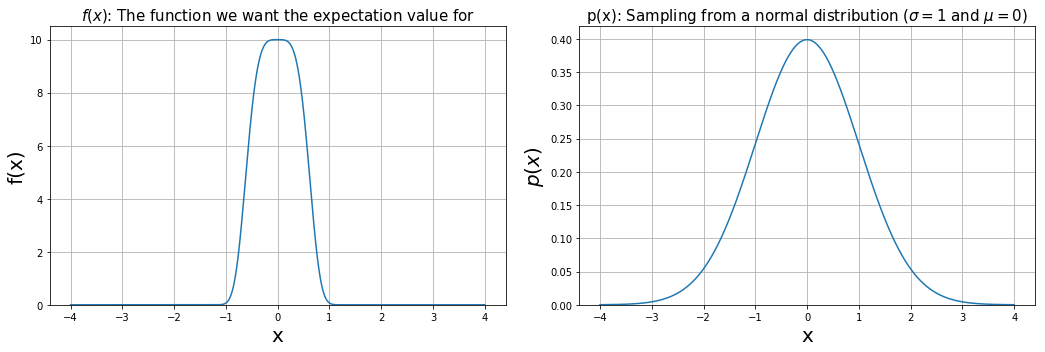

In [24]:
def fn(x):
    return 10*np.exp(-5*(x**4))

def normal_distribution(x, mu, sigma):
    return (1/np.sqrt(2*np.pi*sigma*sigma))*np.exp(-((x-mu)**2)/(2*sigma*sigma))

def example1():
    xvals = np.linspace(-4,4,10000)

    fig,ax = plt.subplots(1,2, figsize=(15,5))
    ax[0].plot(xvals, fn(xvals))
    ax[0].set_title('$f(x)$: The function we want the expectation value for', fontsize=15)
    ax[0].set_ylim(ymin=0)
    ax[0].set_ylabel('f(x)', fontsize=20)
    ax[0].set_xlabel('x', fontsize=20)

    ax[0].grid('on')
    ax[1].plot(xvals, normal_distribution(xvals,0,1));
    ax[1].set_xlabel('x', fontsize=20)
    ax[1].set_ylabel('$p(x)$', fontsize=20)
    ax[1].set_ylim(ymin=0)
    ax[1].set_title('p(x): Sampling from a normal distribution ($\sigma=1$ and $\mu=0$)', fontsize=15)
    ax[1].grid('on')

    plt.tight_layout()
    return

example1()

Using Wolfram Alpha [6] to calculate the theoretical expectation value:

$$E(f(X))=\int f(x)p(x) dx$$
$$\int^{\infty}_{-\infty} \frac{10 \exp(-5x^4)\exp(-\frac{x^2}{2})}{\sqrt{2\pi}}dx\approx 4.49894$$


Using Monte-Carlo to calculate the approximate expectation value:


In [4]:
# get 10000000 from the standard normal distribution
x = np.random.randn(10000000)

# find fn(x) for each x value
fx = fn(x)

# calculate the approximate expectation value
# by taking the average of fn(x)
fx_avg = np.average(fn(x))
print("Expectation value:", fx_avg)

4.49841626736


## Example 2

Now let’s take the function f(x) [5] where,
$$f(x)=10e^{-5(x-3)^4}$$
(which is very similar to the function from our first example just shifted to the right by x=3)

The PDF p(x) [5] will again be the standard normal distribution centered at 0 ($\sigma = 1$ and $\mu = 0$)
$$p(x)=\frac{1}{\sqrt{2\pi}}e^{-x^2/2}$$
From the figure below, it’s easy to see that very few of the values sampled from the PDF will fall inside the meaningful range of the function.

Using Wolfram [6], we compute a theoretical expectation value:

$$E(f(X))=\int f(x)p(x) dx,$$

Where $f(x) = 10 e^{-5(x-3)^4}$ and $p(x)\frac{1}{\sqrt{2\pi}}e^{-x^2/2}$

$$\int^{\infty}_{-\infty} 5 e^{(-3 +x)^4 - \frac{x^2}{2}} \sqrt{\frac{2}{\pi}}dx \approx 0.08939923794604790 $$

Monte-Carlo gives an approximate expectation value with a large variance over 500 trials

Average expected value over 500 trials 0.091021987784
Standard deviation in the average expected value 0.0247068047805


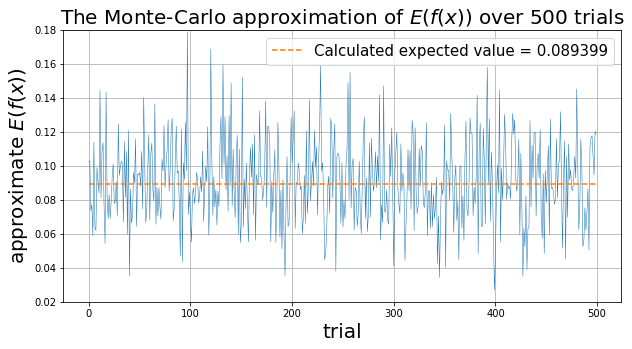

In [5]:
def fn_shifted(x):
    return 10*np.exp(-5*((x-3)**4))

def example2():
    # Use standard Monte Carlo to find the 
    # approximate expectation value 500 times
    f_vals = []
    count = 0
    while(count<500):
        # get a sample of 1000 random values from p(x)
        x = np.random.randn(1000)

        # find the average value of f(x) 
        fx = np.average(fn_shifted(x))

        # store the average value of f(x) 
        # in the array f_vals
        f_vals.append(fx)
        count += 1

    # plot the results
    plt.figure(figsize=(10,5))
    plt.grid('on')
    plt.plot(f_vals, linewidth='0.5')
    plt.plot(np.arange(500), np.ones(500)*0.089399, '--', label='Calculated expected value = 0.089399')
    plt.ylim(0.02,0.18)
    plt.title('The Monte-Carlo approximation of $E(f(x))$ over 500 trials', fontsize=20)
    plt.xlabel('trial', fontsize=20)
    plt.ylabel('approximate $E(f(x))$', fontsize=20)
    plt.legend(loc='best', fontsize=15)
    
    # print the average and standard deviation
    print('Average expected value over 500 trials',np.average(f_vals))
    print('Standard deviation in the average expected value', np.std(f_vals))
    
example2()

## Importance Sampling

In Monte Carlo methods, we generally want to find the expectation value of f(x) with samples drawn from the probability distribution p(x),
$$E(f(X))=\int f(x)p(x)dx$$
In Example 2, the PDF chosen meant that it was quite rare that we would get an x value that fell within the significant range of f(x). In this situation, standard Monte Carlo methods gave a high variance resulting in a poor approximation.

Importance sampling is a variance reduction technique [4]. Using importance sampling, we get a more accurate estimate of the expectation value, with fewer sampling points required. This significantly reduces computing time. 

To implement importance sampling, we choose a new probability distribution q(x) which more closely fits f(x). The new PDF, q(x) is used to assign weights to p(x) and improve its compatibility with f(x) [8].
$$E(f(x))=\int f(x)p(x)dx$$
$$=\int \frac{f(x)p(x)}{q(x)}q(x)=E\bigg(\frac{f(x)p(x)}{q(x)}\bigg)$$

For a numerical Monte-Carlo method, this means, $E(f(x))=\frac{1}{n}\sum f(x_i)\frac{p(x_i)}{q(x_i)}$ with $x_i$ values pulled from the distribution q(x).
The ratios $\frac{p(x_i)}{q(x_i)}$ are called likelihood ratios [8]. If the normalization of p(x) or q(x) are unknown, you can use ratio approximation to determine an appropriate substitute [7].

**Note**: If q(x) is improperly selected, the runtime required to compute a reasonable estimate can converge to infinity. To avoid this problem, keep p(x)/q(x) small. In other words, q(x) should have either the same size or thicker tails than p(x) [4].

## Example 3

Using the same f(x) and p(x) from example 2, we choose a second PDF, q(x) [5], which provides x values more likely to fall within the significant range of f(x).

$$f(x)=10e^{-5(x-3)^4}$$
$$f(x)=\frac{1}{\sqrt{2\pi}}e^{-x^2/2}$$
$$q(x)=\frac{1}{\sqrt{2\pi}}e^{-(x-3)^2/2}$$

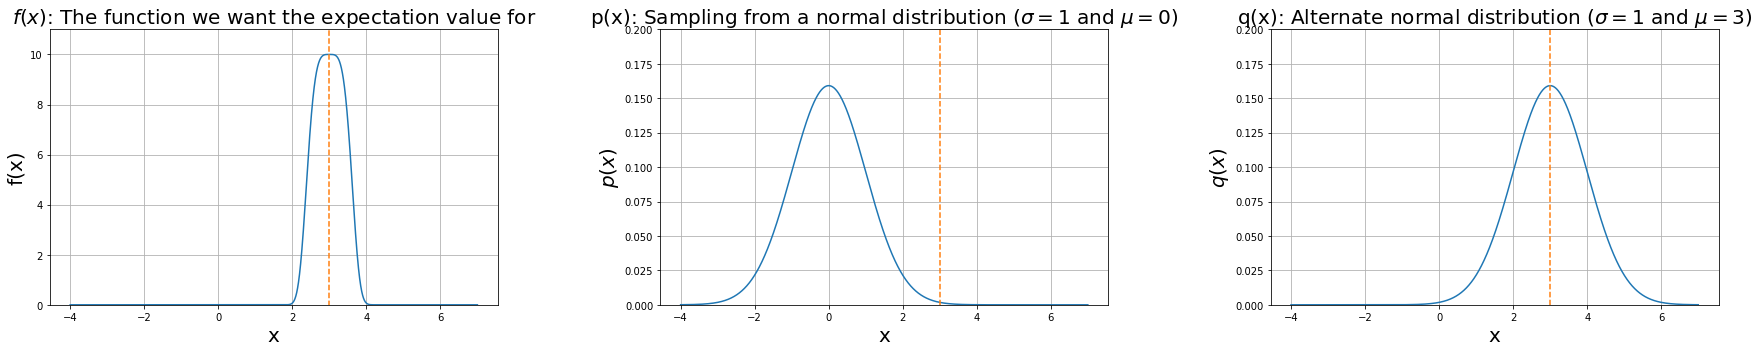

In [21]:
def example3(mu_p=0, sigma_p=1, mu_q=3, sigma_q=1):
    xvals = np.linspace(-4,7,10000)

    fig,ax = plt.subplots(1,3, figsize=(25,5))
    ax[0].plot(xvals, fn_shifted(xvals))
    ax[0].set_title('$f(x)$: The function we want the expectation value for', fontsize=20)
    ax[0].plot(np.ones(10)*3, np.linspace(-1,12,10), '--')
    ax[0].set_ylim(0,11)
    ax[0].set_ylabel('f(x)', fontsize=20)
    ax[0].set_xlabel('x', fontsize=20)
    ax[0].grid('on')

    ax[1].plot(xvals, normal_distribution(xvals,mu_p,sigma_p));
    ax[1].set_xlabel('x', fontsize=20)
    ax[1].set_ylabel('$p(x)$', fontsize=20)
    ax[1].plot(np.ones(10)*3, np.linspace(-1,1,10), '--')
    ax[1].set_ylim(0,0.2)
    ax[1].set_title('p(x): Sampling from a normal distribution ($\sigma=1$ and $\mu=0$)', fontsize=20)
    ax[1].grid('on')

    ax[2].plot(xvals, normal_distribution(xvals,mu_q,sigma_q));
    ax[2].set_xlabel('x', fontsize=20)
    ax[2].set_ylabel('$q(x)$', fontsize=20)
    ax[2].plot(np.ones(10)*3, np.linspace(-1,1,10), '--')
    ax[2].set_ylim(0,0.2)
    ax[2].set_title('q(x): Alternate normal distribution ($\sigma=1$ and $\mu=3$)', fontsize=20)
    ax[2].grid('on')

    plt.tight_layout()
    return

example3()

**Note**: The below methods are interactive in the sense that you can modify the parameters to see how they affect the result. For interesting results, we recommend trying mu_q=-3 and sigma_q=10. These demonstrate the caveats listed above. We leave to you to figure out which is which. Please feel free to confirm with us which is which when you have an answer!

Once you've done that, you can try using different functions such as np.sinc and seeing what happens. Don't forget to uncomment the line setting the ylim though!

Average expected value over 500 trials 0.0892161241947
Standard deviation in the average expected value 0.00390857923997


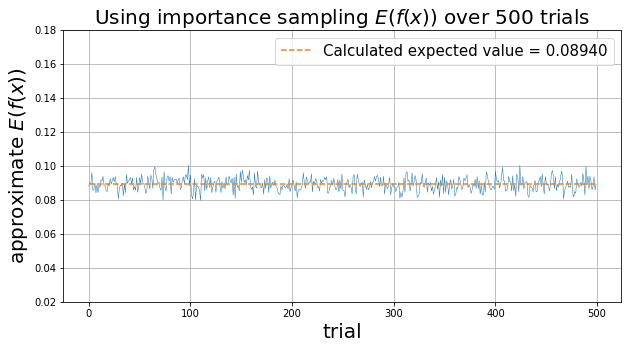

In [32]:
def importance_sampling(fn=fn_shifted, count=500, mu_p=0, sigma_p=1, mu_q=3, sigma_q=1):
    f_vals = []

    # Use importance sampling and Monte Carlo to find the 
    # approximate expectation value 500 times
    for i in range(count):
        # q(x)
        randq = np.random.randn(1000)+3

        # find the average value of f(x) 
        importance_sampling = fn(randq)*normal_distribution(randq,mu_p,sigma_p)/normal_distribution(randq,mu_q,sigma_q)
        fx = np.average(importance_sampling)

        f_vals.append(fx)

    print('Average expected value over', count, 'trials', np.average(f_vals))
    print('Standard deviation in the average expected value', np.std(f_vals))

    # Computing the continuous integral using quad rather than Monte Carlo integration for comparison
    calculated = integrate.quad(lambda x: fn(x)*normal_distribution(x, mu_p, sigma_p), -np.inf, np.inf)[0]

    plt.figure(figsize=(10,5))
    plt.grid('on')
    plt.plot(f_vals, linewidth='0.5')
    plt.plot(np.arange(count), np.ones(count)*calculated, '--', label='Calculated expected value = {:0.5f}'.format(calculated))
    plt.title('Using importance sampling $E(f(x))$ over ' + str(count) + ' trials', fontsize=20)
    plt.xlabel('trial', fontsize=20)
    plt.ylabel('approximate $E(f(x))$', fontsize=20)
    plt.legend(loc='best', fontsize=15)
    plt.ylim(0.02,0.18); # Comment out this line if you change the parameters
    return

importance_sampling()

**Recall**: that in Example 2, we calculate the theoretical expectation value of f(x) using the distribution p(x) and found,
E(f(x)) = 0.0893992379460


## Conclusion

Importance sampling is a variation reduction technique that is useful when you have a function whose maximum coincides with the tail of your probability distribution function, p(x). 

Importance sampling uses the base Monte Carlo algorithm with a few extra lines to sample from an alternate PDF, q(x), which coincides with your function’s maximum region, but uses likelihood ratios to shift the expectation value to that found using the original distribution, p(x). 

Importance sampling does have some limitations however, especially when the normalizations of p(x) or q(x) are unknown, or when the ratio p(x)/q(x) approaches infinity at the tails. These problems can be patched for some functions, but more robust methods, such as Markov Chain Monte-Carlo algorithms, may be needed for particularly difficult functions. 


## References

1. “Probability density function,” Wikipedia, 18-Jan-2018. [Online]. Available: https://en.wikipedia.org/wiki/Probability_density_function. [Accessed: 20-Jan-2018].
2. “Expected value,” Wikipedia, 15-Jan-2018. [Online]. Available: https://en.wikipedia.org/wiki/Expected_value. [Accessed: 20-Jan-2018].
3. J. Cisewski, “Importance Sampling,” Jun-2014. [Online]. Available: http://astrostatistics.psu.edu/su14/lectures/cisewski_is.pdf. [Accessed: 20-Jan-2018].
4. E. Anderson, “Monte Carlo Methods and Importance Sampling,” in Lecture Notes for Stat 578C, 20-Oct-1999. [Online]. Available: http://ib.berkeley.edu/labs/slatkin/eriq/classes/guest_lect/mc_lecture_notes.pdf [Accessed: 20-Jan-2018].
5. M. Taboga, “Importance sampling,” StatLect. [Online]. Available: https://www.statlect.com/asymptotic-theory/importance-sampling. [Accessed: 20-Jan-2018].
6. “Integral Calculator: Integrate with Wolfram|Alpha,” Wolfram|Alpha. [Online]. Available: http://www.wolframalpha.com/calculators/integral-calculator/. [Accessed: 20-Jan-2018].
7. A. Owen, “Chapter 9 Importance sampling,” in Monte Carlo theory, methods and examples, 2013. Available: http://statweb.stanford.edu/~owen/mc/Ch-var-is.pdf [Accessed: 20-Jan-2018].
8. T. Kennedy, “Chapter 6 Importance sampling,” in Monte Carlo Methods - a special topics course, 2016, pp. 57–70. Available: http://math.arizona.edu/~tgk/mc/book.pdf [Accessed: 20-Jan-2018].
